# Модели регрессии

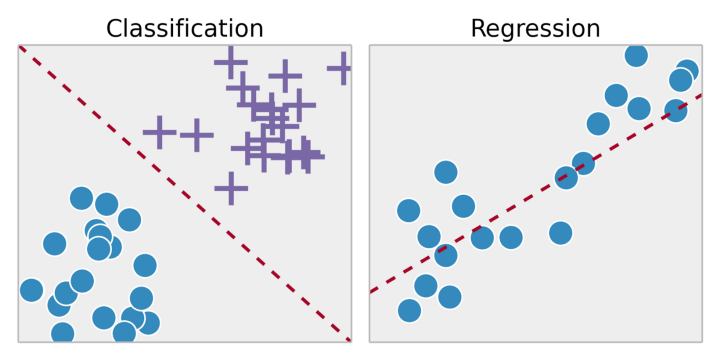

[Источник](https://evileg.com/ru/post/300/)

## Что мы изучим на этом занятии

* Регрессия
    * Что такое регрессия?
    * Линейная регрессия
    * Полиномиальная регрессия
    * Переобучение. Регуляризация. Лассо и Гребневаия регрессии. ElasticNet.

## Регрессия

### Что такое регрессия?

Одной из задач, решаемых машинным обучением, является *регрессия*. Это метод предсказания числового значения на основе входных данных. Основная цель регрессии — **найти зависимость между входными признаками и непрерывной численной целевой переменной**.

С помощью регрессии можно решать такие задачи как:

1. Прогнозирование цен на недвижимость
2. Прогнозирование спроса на продукцию
3. Прогнозирование уровня загрязнения воздуха
4. Анализ зависимости дохода от уровня образования
5. Прогнозирование расходов на рекламу
6. Прогнозирование температуры
7. и другие...

Смоделировать зависимость между признаками и численной целевой переменной можно разными способами. Разные способы моделирования представлены в виде различных моделей, которые мы сейчас рассмотрим.

### Линейная регрессия

Линейная регрессия — это один из самых простых и популярных методов машинного обучения, который используется для предсказания значений непрерывной целевой переменной на основе входных признаков. В основе линейной регрессии лежит предположение, что между входными данными (признаками) и целевой переменной существует линейная зависимость.



#### Основная идея

Линейная регрессия ищет линию, которая лучше всего описывает зависимость между входными признаками и целевой переменной. Эта линия называется **линия регрессии**, и задача состоит в том, чтобы найти её параметры, минимизируя ошибку предсказания.

#### Математическая формулировка



Для одной переменной (простая линейная регрессия) модель имеет вид:

$$ y = wx + b $$

Где:
- $y$ — предсказанное значение целевой переменной,
- $x$ — входной признак (например, площадь квартиры),
- $w$ — коэффициент (наклон линии), который определяет, насколько сильно изменяется $y$ при изменении $x$,
- $b$ — свободный член (сдвиг), который определяет, где линия пересекает ось $y$.

Для нескольких признаков (множественная линейная регрессия) уравнение принимает вид:

$$ y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b $$

Где $x_1, x_2, \dots, x_n$ — это разные входные признаки (например, площадь, количество комнат, возраст дома и т.д.).

#### Как модель обучается

Задача линейной регрессии — найти такие параметры $w_1, w_2, \dots, w_n$ и $b$, которые минимизируют разницу между предсказанными значениями $y$ и фактическими значениями целевой переменной. Для этого используется функция ошибки, обычно это **сумма квадратов ошибок** (MSE — Mean Squared Error):

$$ MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$

Где:
- $y_i$ — истинное значение,
- $\hat{y}_i$ — предсказанное значение,
- $m$ — количество примеров.

#### Пример использования


Представьте, что вы хотите предсказать медианную цену квартир в районе ($y$) на основе заработка его жителей ($x$). Линейная регрессия постарается найти такую прямую линию, которая будет наилучшим образом описывать зависимость между заработком и ценой. Вы получите уравнение вида:

$$ y = w \cdot x + b $$



Давайте посмотрим как мы можем делать предсказания с помощью линейной регрессии.

Загрузим датасет. Для простоты и наглядности мы не будем использовать все данные, а только выборку из 100 наблюдений:

In [ ]:
from sklearn.datasets import fetch_california_housing

# Загружаем housing dataset (используем датасет о домах в Калифорнии)
df = fetch_california_housing(as_frame=True).frame

# Для наглядности возьмем 100 наблюдений
df = df.sample(100)

X = df['MedInc']  # Используем только один признак - медианный заработок жителей района (MedInc)
y = df['MedHouseVal']  # Целевая переменная - медианная цена домов

Визуализируем данные:

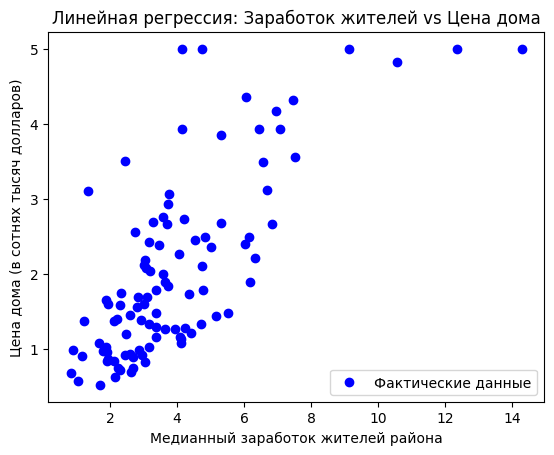

In [ ]:
import matplotlib.pyplot as plt

# Визуализация данных и линии регрессии
plt.scatter(X, y, color='blue', label='Фактические данные')  # Исходные данные
plt.xlabel('Медианный заработок жителей района')
plt.ylabel('Цена дома (в сотнях тысяч долларов)')
plt.title('Линейная регрессия: Заработок жителей vs Цена дома')
plt.legend()
plt.show()


Библиотека `sklearn` в модуле `linear_model` предоставляет реализацию линейной регрессии в классе [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Мы можем обучить её таким образом:

In [ ]:
from sklearn.linear_model import LinearRegression

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(
    X.to_numpy().reshape(-1, 1), # Передаем признаки. У нас один признак, поэтому для работы модели нужно выполнить reshape
    y # Передаем значения целевой переменной
)

LinearRegression()

Изобразим предсказания модели:

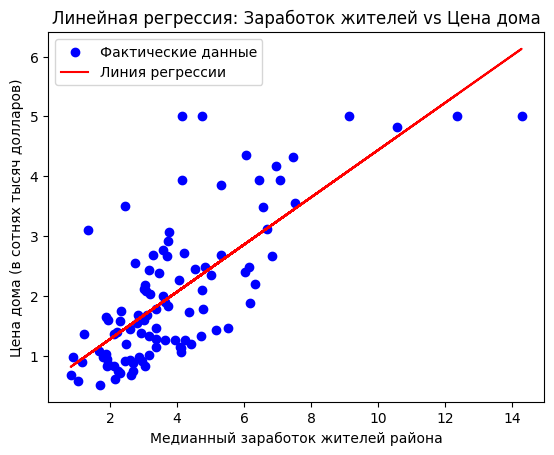

In [ ]:
# Получим предсказания модели
y_pred = model.predict(
    X.to_numpy().reshape(-1, 1) # Передаем признаки. У нас один признак, поэтому для работы модели нужно выполнить reshape
)

# Визуализация данных и линии регрессии
plt.scatter(X, y, color='blue', label='Фактические данные')  # Исходные данные
plt.plot(X, y_pred, color='red', label='Линия регрессии')  # Линия регрессии
plt.xlabel('Медианный заработок жителей района')
plt.ylabel('Цена дома (в сотнях тысяч долларов)')
plt.title('Линейная регрессия: Заработок жителей vs Цена дома')
plt.legend()
plt.show()


Посмотрим как мы можем делать конкретные интересующие нас предсказания:

In [ ]:
import numpy as np

# Предсказание цены для нового района (например, район с заработком 8 тыс. долларов)
new_house = np.array([[8]])
predicted_price = model.predict(new_house)
print(f"Предсказанная цена для района с заработком 8 тыс. долларов: {(predicted_price[0] * 100):.0f} тыс. долларов")

Предсказанная цена для района с заработком 8 тыс. долларов: 365 тыс. долларов


Протестируем модель. Для этого разделим данные на тренировочные и тестовые данные с помощью функции [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) из `sklearn`. Обучим модель на тренирвочных данных и вычислим MSE c помощью функции `mean_squared_error` на тестовых данных:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(
    X_train.to_numpy().reshape(-1, 1),
    y_train
)

# Предсказание для тестовых данных
y_pred = model.predict(X_test.to_numpy().reshape(-1, 1))

# Оценка модели: вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

Среднеквадратичная ошибка (MSE): 1.11


### Полиномиальная регрессия

Линейная регрессия хорошо работает, когда зависимость между признаками и целевой переменной действительно линейна. Однако, если данные имеют сложные нелинейные зависимости, то линейная модель может давать низкую точность. В таких случаях можно использовать более сложные модели или расширить линейную регрессию с помощью полиномиальных признаков (полиномиальная регрессия).

Полиномиальная регрессия — это метод машинного обучения, который расширяет возможности линейной регрессии, позволяя моделировать нелинейные зависимости между признаками и целевой переменной. В отличие от линейной регрессии, которая строит прямую линию, полиномиальная регрессия позволяет строить более сложные кривые, которые могут лучше описывать нелинейные зависимости в данных.

#### Основная идея

Если зависимость между переменными не является линейной, то для повышения точности предсказаний можно использовать полиномиальные функции от признаков.

Модель полиномиальной регрессии описывается следующим образом:

$$ y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_n x^n $$

Где:
- $y$ — предсказанное значение,
- $x$ — входной признак,
- $w_0, w_1, \dots, w_n$ — коэффициенты модели,
- $n$ — степень полинома.

#### Как модель обучается

Полиномиальная регрессия — это расширение линейной регрессии, где в модель добавляются полиномиальные признаки. Поэтому с точки зрения обучения ничего значительно не меняется. При обучении полиномиальной регрессии так же уменьшается MSE, как и в линейной регрессии. Отличие с линейной регрессией лишь в том, что полиномиальной передается больше признаков на вход модели.

#### Пример использования

Теперь посмотрим как можно обучать и использовать модель полиномиальной регрессии. Как обычно, сначала загрузим датасет. Это датасет с информацией о милях на галлон для различных автомобилей:

In [ ]:
import seaborn as sns

# Загружаем датасет mpg
df = sns.load_dataset('mpg')

X = df['weight']
y = df['mpg']

Посмотрим на график рассеивания признаков MPG и веса автомобиля:

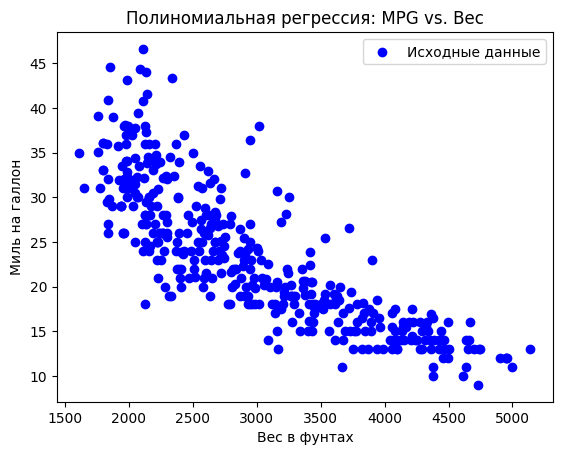

In [ ]:
import matplotlib.pyplot as plt

# Визуализация результатов
plt.scatter(X, y, color='blue', label='Исходные данные')
plt.xlabel('Вес в фунтах')
plt.ylabel('Миль на галлон')
plt.title('Полиномиальная регрессия: MPG vs. Вес')
plt.legend()
plt.show()

Для того, чтобы модифицировать линейную регрессию до полиномиальной, нам создать полиномиальные признаки. Их можно создать с помощью [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Преобразование признаков в полиномиальные (например, второй степени)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.to_numpy().reshape(-1, 1))
X_poly

array([[1.0000000e+00, 3.5040000e+03, 1.2278016e+07],
       [1.0000000e+00, 3.6930000e+03, 1.3638249e+07],
       [1.0000000e+00, 3.4360000e+03, 1.1806096e+07],
       ...,
       [1.0000000e+00, 2.2950000e+03, 5.2670250e+06],
       [1.0000000e+00, 2.6250000e+03, 6.8906250e+06],
       [1.0000000e+00, 2.7200000e+03, 7.3984000e+06]])

Теперь обучим линейную регрессию с полиномиальными признаками

In [ ]:
from sklearn.linear_model import LinearRegression

# Обучение модели линейной регрессии на полиномиальных признаках
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

Изобразим предсказания обученной модели

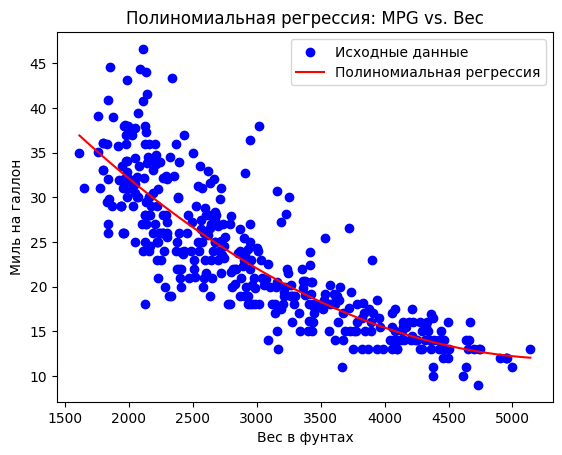

In [ ]:
# Визуализация результатов
plt.scatter(X, y, color='blue', label='Исходные данные')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
plt.plot(X_range, model.predict(X_range_poly), color='red', label='Полиномиальная регрессия')
plt.xlabel('Вес в фунтах')
plt.ylabel('Миль на галлон')
plt.title('Полиномиальная регрессия: MPG vs. Вес')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Входной признак: вес 5000 фунтов
input = np.array([[5000]])
# Создадим полиномиальные признаки для входного признака
input_poly = poly.transform(input)

# Предскажем количество миль на галлон
predicted_value = model.predict(input_poly)
print(predicted_value)

[12.21820044]


Протестируем модель, посчитав MSE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Преобразование признаков в полиномиальные (например, второй степени)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Обучение модели линейной регрессии на полиномиальных признаках
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание для тестовых данных
y_pred = model.predict(X_test_poly)

# Оценка модели: вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

Среднеквадратичная ошибка (MSE): 13.13


### Регуляризация

#### Переобучение. Дилемма смещения-дисперсии.

Как вы могли заметить, добавление полиномиальных признаков сделало прямую предсказаний гибче и теперь это уже не прямая, а кривая.

Таким образом, модель становится **сложнее**. У нее появляется больше параметров. И, на самом деле, с добавлением параметров и признаков модель будет становиться сложнее и сложнее, а кривая предсказаний будет более гибче.

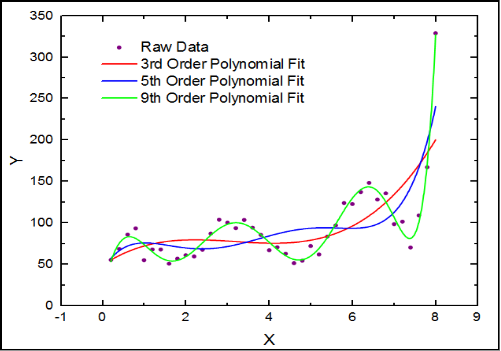

Источник: https://towardsdatascience.com/polynomial-regression-an-alternative-for-neural-networks-c4bd30fa6cf6

Казалось бы, так даже лучше, что модель становится более гибче и лучше повторяет данные. Однако, на самом деле **это делает модель хуже**. Слишком сложная модель начинает излишне повторять тренировочные данные и быть слишком чувствительной к шуму в данных. На тестовых данных такая модель будет показывать себя плохо. Такое явление называется *переобучением* (или *overfitting*).

В целом, увеличение сложности модели улучшает тестовые метрики, но только до определенного момента. Об этом говорит [диллема смещения-дисперсии](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%BB%D0%B5%D0%BC%D0%BC%D0%B0_%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F-%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8)

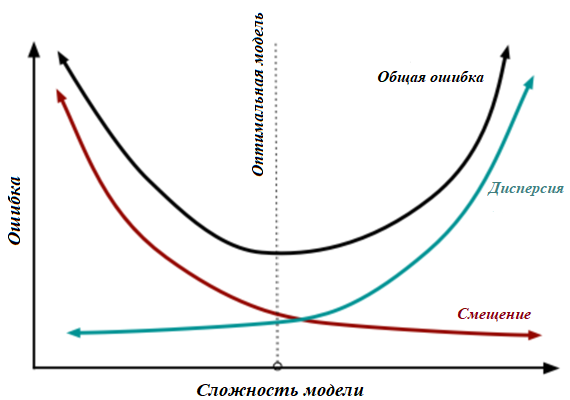

Источник: https://habr.com/ru/companies/otus/articles/773102/

#### Что такое регуляризация?

Один из подходов к борьбе с переобучением - это *регуляризация*.  Основная идея регуляризации заключается в добавлении штрафного элемента в функцию ошибки модели, который помогает снизить сложность модели и предотвратить её слишком точное подстраивание под обучающие данные. Это позволяет улучшить обобщающую способность модели на тестовых данных.

Регуляризация модифицирует функцию потерь таким образом:

$$ \text{Потеря} = \text{Ошибка предсказания} + \lambda \cdot \text{Сложность модели}  $$

В фукнцию потерь, помимо ошибки предсказания, добавляется ещё и мера сложности модели. Это мера сложности также масштабирована константой $ \lambda $. При увеличении $ \lambda $ мы начинаем больше штрафовать модель, если она становится сложной. Соответственно, при меньшем $ \lambda $ мы штрафуем модель меньше.

#### L2-регуляризация. Гребневая (Ridge) регрессия

В L2-регуляризации к функции потерь добавляется сумма квадратов весов модели. Штрафная функция выглядит следующим образом:

   $$ \text{Loss} = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{true}, i} - y_{\text{pred}, i})^2 + \lambda \sum_{j=1}^{n} w_j^2 $$

   Где:
   - $m$ — количество обучающих примеров,
   - $y_{\text{true}}$ — истинное значение целевой переменной,
   - $y_{\text{pred}}$ — предсказанное значение модели,
   - $w_j$ — коэффициенты модели,
   - $\lambda$ — коэффициент регуляризации, который определяет, насколько сильный штраф накладывается на веса.

L2-регуляризация заставляет модель минимизировать не только ошибку на обучающих данных, но и величину весов. Это приводит к тому, что веса модели становятся меньше, что снижает сложность модели и помогает избежать переобучения.

Для того, чтобы обучить гребневую регрессию, необходимо использовать класс [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) вместо LinearRegression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# Загружаем датасет mpg
df = sns.load_dataset('mpg')
X = df['weight']
y = df['mpg']

# Преобразование признаков в полиномиальные
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X.to_numpy().reshape(-1, 1))
X_poly

# Загружаем данные и разделяем на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Создаем модель Ridge-регрессии
ridge_model = Ridge(alpha=1.0)  # alpha - это параметр регуляризации (λ)
ridge_model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")


Среднеквадратичная ошибка (MSE): 13.06


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.19989e-39): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


#### L1-регуляризация. Лассо регрессия

В L1-регуляризации к функции потерь добавляется сумма абсолютных значений весов:

   $$ \text{Loss} = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{true}, i} - y_{\text{pred}, i})^2 + \lambda \sum_{j=1}^{n} |w_j| $$

L1-регуляризация также снижает значения весов, но в отличие от L2, она может занулять некоторые коэффициенты. Это приводит к тому, что модель "отключает" менее важные признаки, делая её более простой и интерпретируемой. L1-регуляризация используется для отбора признаков.

Для обучения Лассо регрессии используется класс [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) вместо LinearRegression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# Загружаем датасет mpg
df = sns.load_dataset('mpg')
X = df['weight']
y = df['mpg']

# Преобразование признаков в полиномиальные
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X.to_numpy().reshape(-1, 1))
X_poly

# Загружаем данные и разделяем на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Создаем модель Ridge-регрессии
ridge_model = Lasso(alpha=1.0)  # alpha - это параметр регуляризации (λ)
ridge_model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")


Среднеквадратичная ошибка (MSE): 13.18


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.940e+03, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(


#### Elastic Net

Это комбинация L1 и L2 регуляризаций. Модель включает оба штрафа:

   $$ \text{Loss} = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{true}, i} - y_{\text{pred}, i})^2 + \lambda_1 \sum_{j=1}^{n} |w_j| + \lambda_2 \sum_{j=1}^{n} w_j^2 $$

Это даёт баланс между штрафами L1 и L2, что может быть полезно в задачах, где нужно одновременно уменьшить сложность модели и выполнить отбор признаков.

Для обучения Elastic Net используется класс [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) вместо LinearRegression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# Загружаем датасет mpg
df = sns.load_dataset('mpg')
X = df['weight']
y = df['mpg']

# Преобразование признаков в полиномиальные
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X.to_numpy().reshape(-1, 1))
X_poly

# Загружаем данные и разделяем на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Создаем модель Ridge-регрессии
ridge_model = ElasticNet(alpha=1.0)  # alpha - это параметр регуляризации (λ)
ridge_model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")


Среднеквадратичная ошибка (MSE): 13.18


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.938e+03, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(


## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

Обучите Ridge и Lasso регрессии на датасете `tips` и посчитайте для них MSE. Какая модель показала себя лучше с точки зрения MSE?

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Импортируем функцию для разделения данных на тренировочный и тестовый датасеты
from sklearn.model_selection import ...
# Импортируем энкодер
from sklearn.preprocessing import ...
# Имортируем масштабатор
from sklearn.preprocessing import ...
# Имопртируем гребневую регрессию
from sklearn.linear_model import ...
# Импортируем функцию для подсчета MSE
from sklearn.metrics import ...

# Загрузка датасета "tips"
data = sns.load_dataset("tips")

# Разделяем признаки на численные и категориальные
X_num = data[["total_bill", "size"]]
X_cat = data[["sex", "smoker", "day", "time"]]

# Создаем энкодер
enc = ...
# Энкодим категориальные признаки
X_cat_enc = ...

# Конкатенируем численные и категориальные признаки
X = np.hstack([X_num, X_cat_enc])
# Выбираем целевую переменную
y = data["tip"]

# Создаем масштабатор
scaler = ...
# Масштабируем данные
X = ...

# Разделение данных на обучающую и тестовую выборки с параметрами test_size=0.3 и random_state=42
X_train, X_test, y_train, y_test = ...

# Создание модели Ridge регрессии c alpha=1
ridge_model = ...
# Обучение модели
...

# Предсказание на тестовых данных
y_pred = ...

# Оценка качества модели
mse = ...
print(f"Mean Squared Error: {mse:.2f}")

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Импортируем функцию для разделения данных на тренировочный и тестовый датасеты
from sklearn.model_selection import ...
# Импортируем энкодер
from sklearn.preprocessing import ...
# Имортируем масштабатор
from sklearn.preprocessing import ...
# Имопртируем лассо регрессию
from sklearn.linear_model import ...
# Импортируем функцию для подсчета MSE
from sklearn.metrics import ...

# Загрузка датасета "tips"
data = sns.load_dataset("tips")

# Разделяем признаки на численные и категориальные
X_num = data[["total_bill", "size"]]
X_cat = data[["sex", "smoker", "day", "time"]]

# Создаем энкодер
enc = ...
# Энкодим категориальные признаки
X_cat_enc = ...

# Конкатенируем численные и категориальные признаки
X = np.hstack([X_num, X_cat_enc])
# Выбираем целевую переменную
y = data["tip"]

# Создаем масштабатор
scaler = ...
# Масштабируем данные
X = ...

# Разделение данных на обучающую и тестовую выборки с параметрами test_size=0.3 и random_state=42
X_train, X_test, y_train, y_test = ...

# Создание модели лассо регрессии c alpha=1
lasso_model = ...
# Обучение модели
...

# Предсказание на тестовых данных
y_pred = ...

# Оценка качества модели
mse = ...
print(f"Mean Squared Error: {mse:.2f}")


## Заключение

На этом занятии мы познакомились с важными методами машинного обучения для решения задач регрессии. Мы узнали, что регрессия помогает моделировать зависимость между признаками и непрерывной целевой переменной, а также изучили два ключевых типа регрессий: линейную и полиномиальную.

Кроме того, мы рассмотрели важные вопросы переобучения, когда модель слишком точно подстраивается под тренировочные данные, и увидели, как регуляризация помогает справляться с этой проблемой, улучшая обобщающую способность модели. Мы познакомились с тремя основными техниками регуляризации:
- **Гребневая (Ridge) регрессия (L2-регуляризация)**, которая снижает значения весов, уменьшая сложность модели.
- **Лассо регрессия (L1-регуляризация)**, которая зануляет незначимые признаки, что помогает в отборе наиболее важных данных.
- **Elastic Net**, которая сочетает преимущества как L1-, так и L2-регуляризаций.

Эти методы позволяют не только повысить точность предсказаний, но и лучше контролировать сложность моделей, особенно при работе с большими и сложными данными.